In [2]:
import pandas as pd
train_data = pd.read_csv('../../data/train_data.csv')
test_data = pd.read_csv('../../data/test_data.csv')
len(train_data), len(test_data)

(124013, 53149)

In [3]:
# Check for data leaks
overlapping_rows = train_data.merge(test_data, how='inner')
print(f"Number of overlapping rows: {len(overlapping_rows)}")

Number of overlapping rows: 0


In [4]:
# Drop rows with empty values
train_data.drop(["latitude", "longitude", "env", "TestId", "date_initial", "date_final", "Feature", "Unnamed: 0"], axis=1, inplace=True)
test_data.drop(["latitude", "longitude", "env", "TestId", "date_initial", "date_final", "Feature", "Unnamed: 0"], axis=1, inplace=True)

train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

len(train_data), len(test_data)

(123981, 53130)

In [5]:
X_train = train_data.drop(["Productivity (y)"], axis=1)
y_train = train_data["Productivity (y)"]

X_test = test_data.drop(["Productivity (y)"], axis=1)
y_test = test_data["Productivity (y)"]

In [6]:
X_train = pd.get_dummies(X_train, columns=["Specie"], drop_first=True)  # drop_first=True to avoid multicollinearity
X_test = pd.get_dummies(X_test, columns=["Specie"], drop_first=True)  # drop_first=True to avoid multicollinearity

In [10]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import r2_score
import numpy as np 
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# print(f"Selected Features: {selected_features}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 1.1716
R² Score: 0.8866


In [8]:
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


reg = TabNetRegressor()
reg.fit(
  X_train.values.astype(float), y_train.values.astype(float).reshape(-1, 1),
  max_epochs=10

)


/opt/anaconda3/envs/tiles/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(
/opt/anaconda3/envs/tiles/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/opt/anaconda3/envs/tiles/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 27.15493|  0:00:03s
epoch 1  | loss: 2.49384 |  0:00:06s
epoch 2  | loss: 2.19679 |  0:00:08s
epoch 3  | loss: 2.09041 |  0:00:10s
epoch 4  | loss: 1.97447 |  0:00:11s
epoch 5  | loss: 1.89094 |  0:00:14s
epoch 6  | loss: 1.84095 |  0:00:17s
epoch 7  | loss: 1.81823 |  0:00:20s
epoch 8  | loss: 1.79865 |  0:00:21s
epoch 9  | loss: 1.74163 |  0:00:23s


In [9]:
# Predict on test set
y_pred = reg.predict(X_test.values.astype(float))

# Regression Analysis
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.9448
Mean Squared Error (MSE): 1.6279
Root Mean Squared Error (RMSE): 1.2759
R² Score: 0.8655


In [31]:
reg.feature_importances_

array([0.00000000e+00, 4.11311026e-02, 0.00000000e+00, 5.07018947e-02,
       0.00000000e+00, 4.75799340e-02, 3.61992922e-02, 1.17888917e-01,
       3.14648691e-03, 0.00000000e+00, 6.93558319e-03, 2.82702296e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.02706799e-02,
       2.17486773e-02, 1.30695880e-03, 7.46994701e-02, 3.63885924e-02,
       0.00000000e+00, 1.36017756e-02, 1.55036616e-02, 0.00000000e+00,
       0.00000000e+00, 8.72263465e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.60988136e-03, 4.62367639e-02, 3.49142236e-02,
       0.00000000e+00, 9.05670798e-02, 5.08882217e-02, 1.00722313e-02,
       0.00000000e+00, 6.38435309e-02, 4.86645793e-03, 0.00000000e+00,
       1.27260068e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.18714955e-01, 0.00000000e+00, 2.33142967e-02, 0.00000000e+00,
       2.26270049e-02, 0.00000000e+00, 0.00000000e+00, 7.32962922e-03,
       1.57130636e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [33]:
explain_matrix, masks = reg.explain(X_test.values.astype(float))

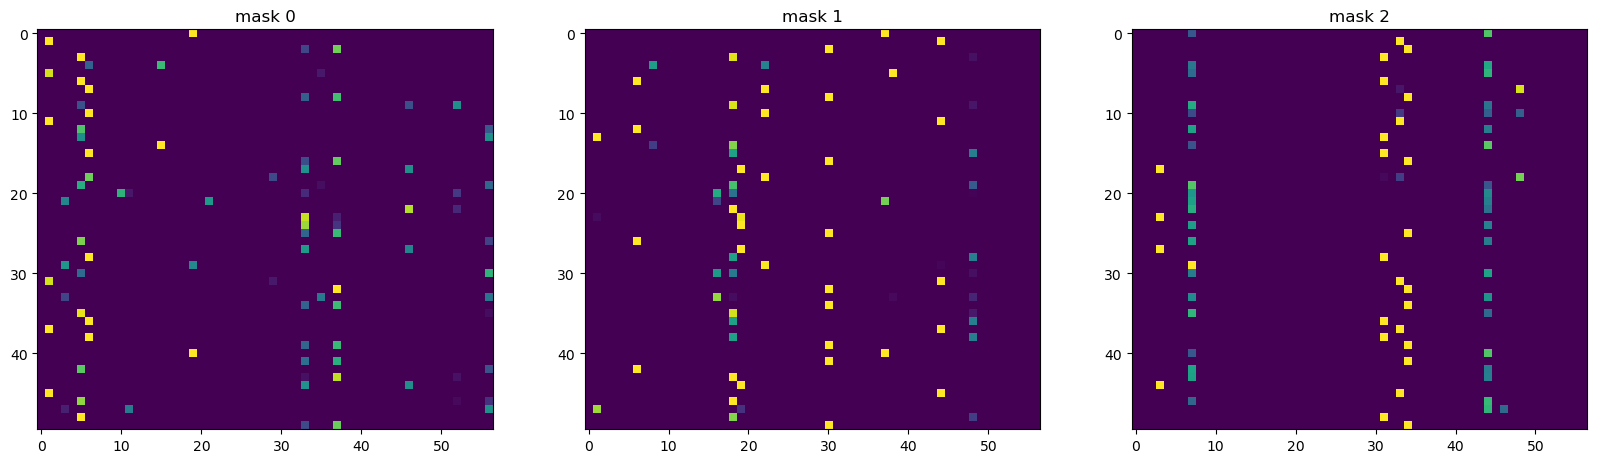

In [34]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

In [40]:
# Assuming X_train is a Pandas DataFrame
feature_names = X_train.columns

# Feature importances from TabNet
importances = reg.feature_importances_  # or reg.feature_importances_ for regression

# Pair feature names with their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Sort features by importance (optional)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature names and their importances
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.6f}")


Specie_PGRN: 0.118715
bio_15: 0.117889
wv0033: 0.090567
bio_8: 0.074699
NDVI_5DayAvg_initial: 0.063844
wv1500: 0.050888
bio_11: 0.050702
bio_13: 0.047580
silt: 0.046237
bio_1: 0.041131
bio_9: 0.036389
bio_14: 0.036199
soc: 0.034914
Specie_PTEL: 0.025488
Specie_PMAX: 0.023314
Specie_PPAT: 0.022627
bio_6: 0.021749
Specie_PPATxPTEH: 0.015713
cec: 0.015504
bdod: 0.013602
bio_5: 0.010271
slope: 0.010072
Specie_PPATxPOOC: 0.007330
bio_18: 0.006936
NDVI_15DayAvg_final: 0.004866
sand: 0.004610
bio_16: 0.003146
bio_19: 0.002827
bio_7: 0.001307
nitrogen: 0.000872
Specie_PCARxPOOC: 0.000013
age (years): 0.000000
bio_10: 0.000000
bio_12: 0.000000
bio_17: 0.000000
bio_2: 0.000000
bio_3: 0.000000
bio_4: 0.000000
elev: 0.000000
cfvo: 0.000000
clay: 0.000000
ocd: 0.000000
ocs: 0.000000
phh2o: 0.000000
wv0010: 0.000000
NDVI_5DayAvg_final: 0.000000
NDVI_15DayAvg_initial: 0.000000
Specie_PCARxPTEL: 0.000000
Specie_PELL: 0.000000
Specie_PELLxPCAR: 0.000000
Specie_PGRS: 0.000000
Specie_POOC: 0.000000
Speci